## STEPS
- Import libraries
- Import dataset
- Perform Data Analysis & EDA
- Splitting the data
- [Optional] Data Processing - Feature Scaling, ...
- Choosing a model - Decision Tree Regressor
- Training the model
- Testing the model
- Checking the performance of model

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Problem Statement

In [3]:
# Importing the dataset
link = "https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv"
df = pd.read_csv(link)

In [4]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
df.ndim

2

In [6]:
df.shape

(4340, 8)

In [7]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [8]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [10]:
df.fuel.value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [11]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [12]:
# Create a column new_fuel at the index of the fuel column (index = 4)
# Replace the values :
# Petrol - 0
# Diesel - 1
# CNG - 2
# LPG - 3
# Electric - 4

In [13]:
value = {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2, 'LPG' : 3, 'Electric' : 4}
df['new_fuel'] = df['fuel'].map(value)
df.insert(df.columns.get_loc('fuel'), 'new_fuel', df.pop('new_fuel'))

In [14]:
df.new_fuel.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [15]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [16]:
# Create a column new_ at seller_type the index of the fuel column (index = 6)
# Replace the values :
# Individual - 0
# Dealer - 1
# Trustmark Dealer - 2

In [17]:
value = {'Individual' : 0, 'Dealer' : 1, 'Trustmark Dealer' : 2}
df['new_seller_type'] = df['seller_type'].map(value)
df.insert(df.columns.get_loc('seller_type'), 'new_seller_type', df.pop('new_seller_type'))

In [18]:
df.new_seller_type.unique()

array([0, 1, 2], dtype=int64)

In [19]:
new_df = df.copy()

In [20]:
new_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'new_fuel', 'fuel',
       'new_seller_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

In [21]:
new_df = new_df['fuel']

In [22]:
type(new_df)

pandas.core.series.Series

In [23]:
new_df = df[['fuel', 'seller_type']]

In [24]:
new_df.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [25]:
# Changing the values which are in the form of categories using encoders

# One Hot Encoder : creates n columns for n categories
# ex : fuel
# fuel_Petrol, fuel_CNG, .....
# It fills that category with 1 and others a 0 in a particular row

# Label Encoder : gives a value to each category in lexical order of the category name

In [26]:
# LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
# new_df['fuel'] = LabelEncoder().fit_transform(new_df['fuel']) --> Gives a warning

# Using .loc to avoid SettingWithCopyWarning
new_df.loc[:, 'fuel'] = LabelEncoder().fit_transform(new_df['fuel'])

In [27]:
new_df['fuel'].unique()
# Assigned the values in lexical order

array([4, 1, 0, 3, 2], dtype=object)

In [28]:
new_df.head()

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual


# ONE HOT ENCODER

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(new_df)

OneHotEncoder(handle_unknown='ignore')

In [31]:
new_df

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual
...,...,...
4335,1,Individual
4336,1,Individual
4337,4,Individual
4338,1,Individual


In [32]:
enc_df = pd.DataFrame(enc.fit_transform(new_df[['seller_type']]).toarray())

In [33]:
enc_df

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4335,0.0,1.0,0.0
4336,0.0,1.0,0.0
4337,0.0,1.0,0.0
4338,0.0,1.0,0.0


In [34]:
new_df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

# ONE HOT ENCODER USING PANDAS

In [35]:
new_df = pd.get_dummies(new_df)

In [36]:
new_df

,fuel_0,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,False,False,False,False,True,False,True,False
1,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,True,False
3,False,False,False,False,True,False,True,False
4,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
4335,False,True,False,False,False,False,True,False
4336,False,True,False,False,False,False,True,False
4337,False,False,False,False,True,False,True,False
4338,False,True,False,False,False,False,True,False


In [37]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [38]:
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [39]:
df.drop(['new_fuel', 'new_seller_type'], inplace = True, axis = 1)

In [40]:
# Create a columns no_of_years = current year - year
from datetime import datetime
current_year = datetime.now().year
df['no_of_years'] = current_year - df['year']

In [41]:
# Drop columns : name, year, current_year
# Rename selling_price to current_selling_price

# I haven't included current_year... ignore that

In [42]:
df.drop(['name', 'year'], inplace = True, axis = 1)
df.rename(columns={'selling_price': 'current_selling_price'}, inplace=True)

In [43]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,17
1,135000,50000,4,1,1,0,17
2,600000,100000,1,1,1,0,12
3,250000,46000,4,1,1,0,7
4,450000,141000,1,1,1,2,10


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   fuel                   4340 non-null   int32
 3   seller_type            4340 non-null   int32
 4   transmission           4340 non-null   int32
 5   owner                  4340 non-null   int32
 6   no_of_years            4340 non-null   int64
dtypes: int32(4), int64(3)
memory usage: 169.7 KB


In [45]:
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


<Axes: >

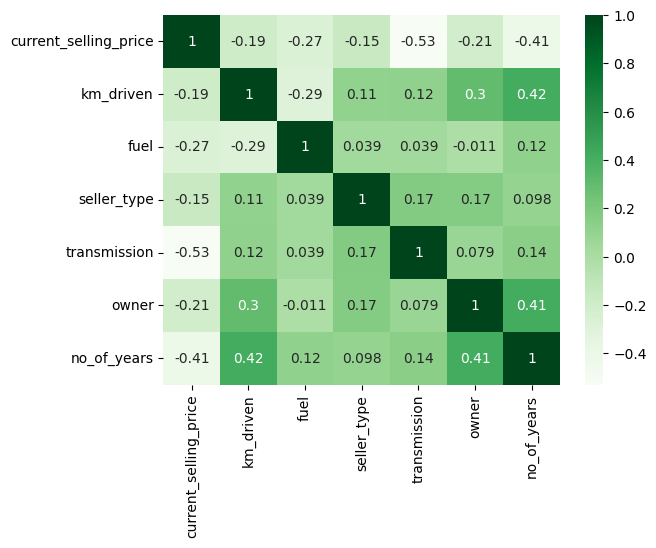

In [46]:
# Correlation Heatmap
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

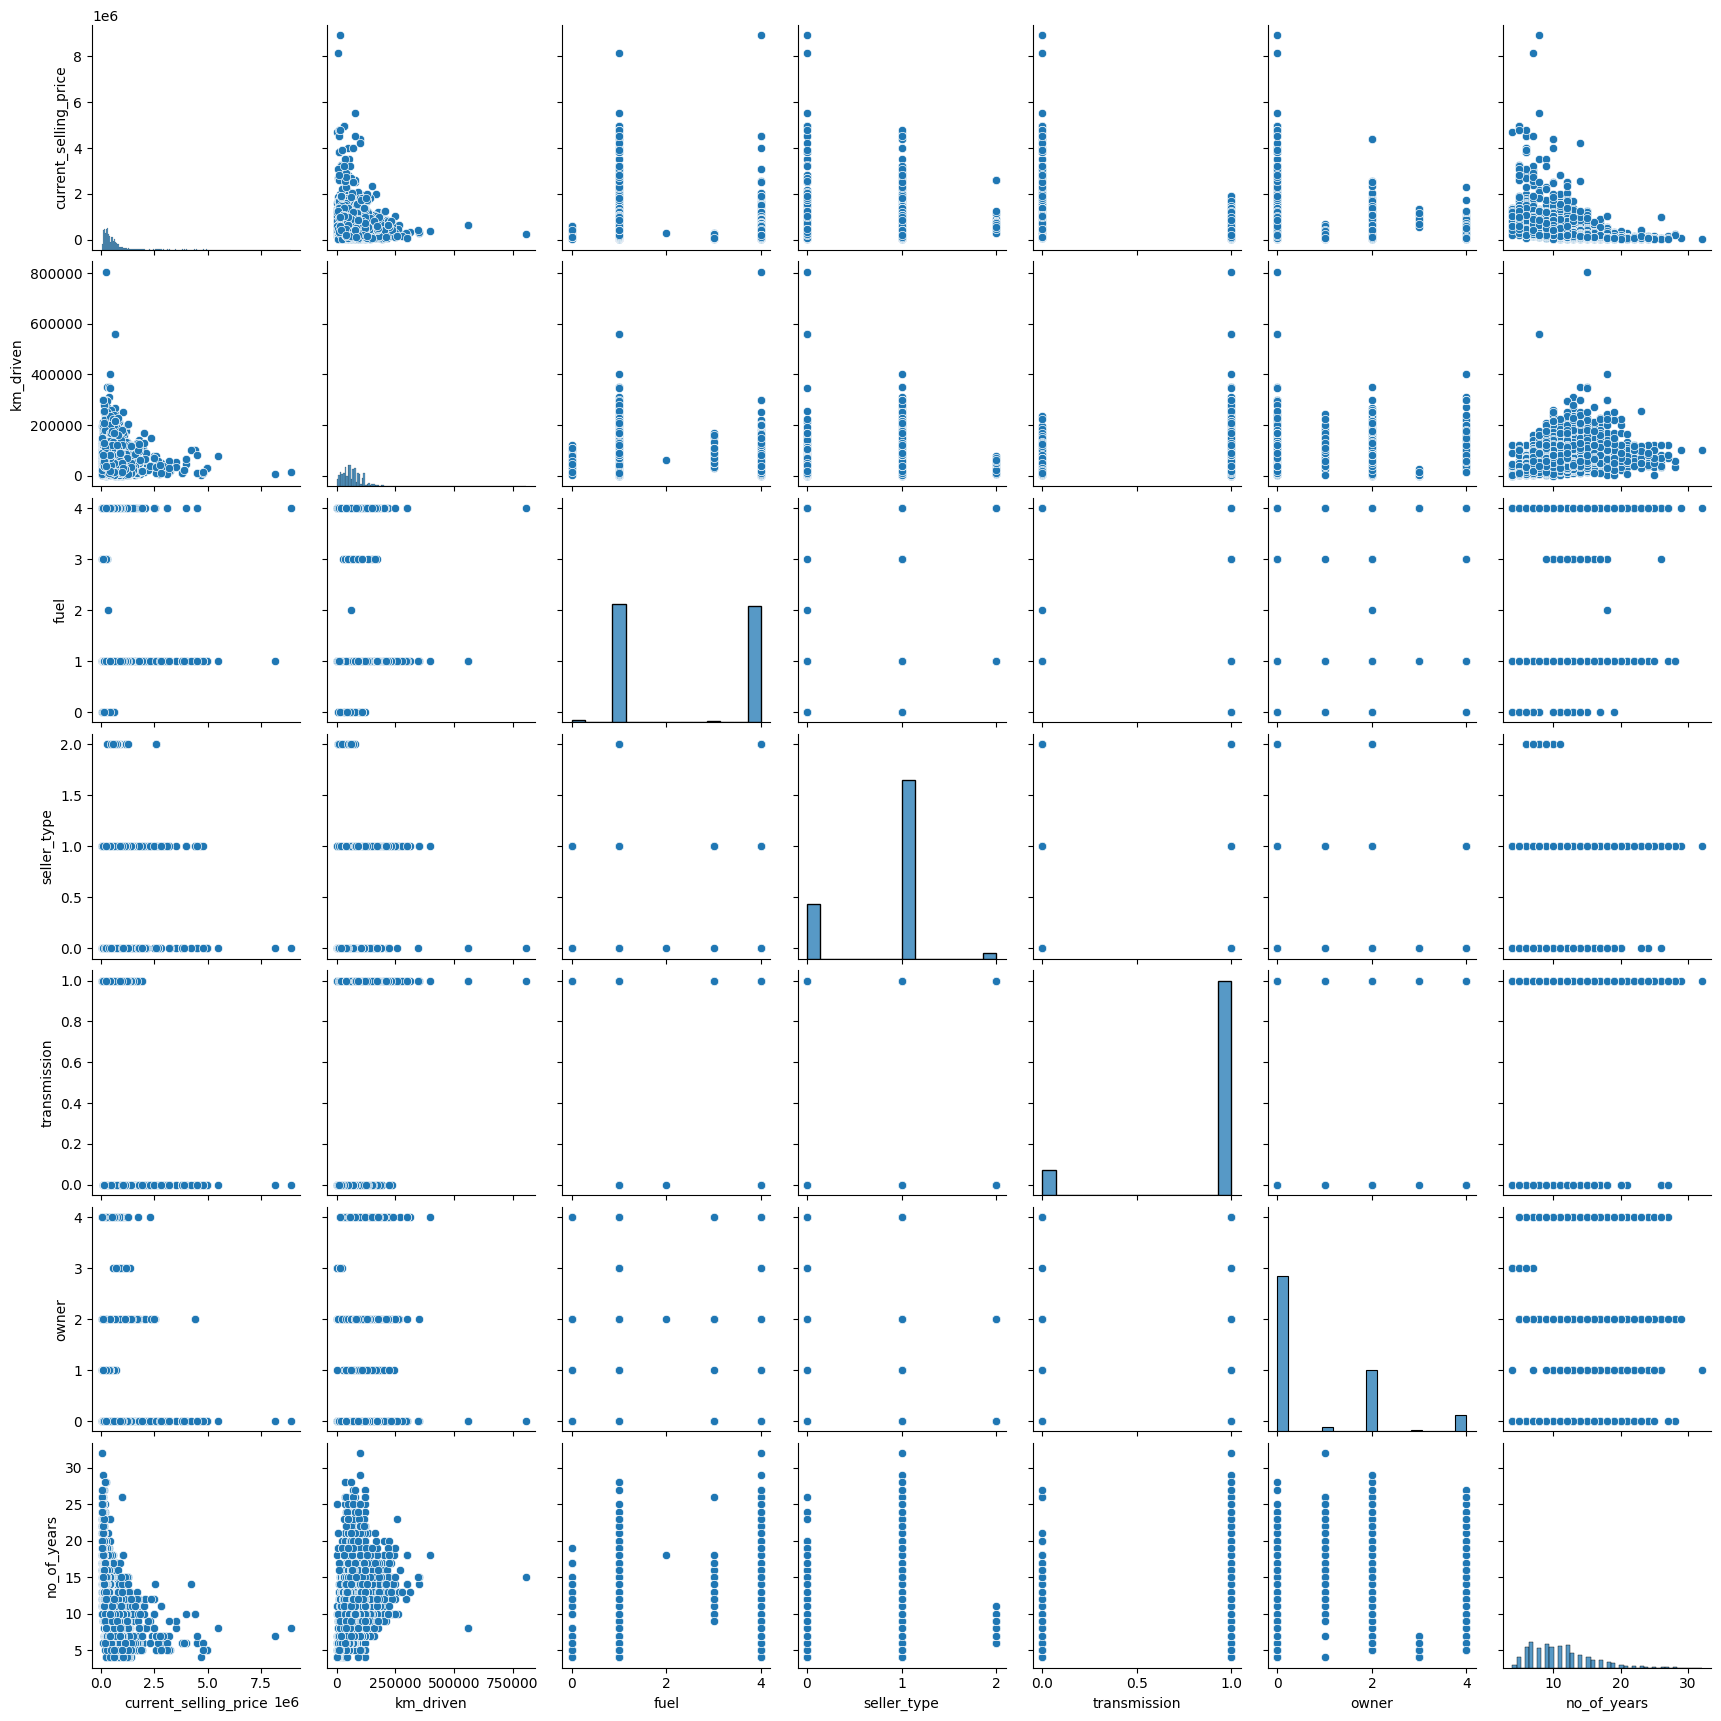

In [47]:
# Pairplot
sns.pairplot(df)

<Axes: >

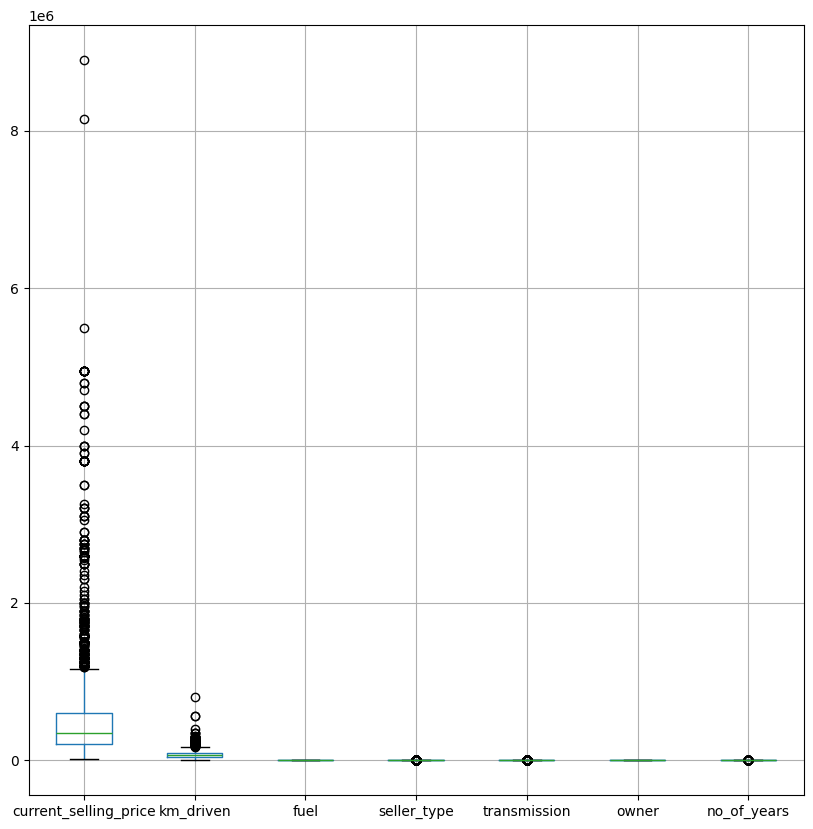

In [48]:
# Boxplot
plt.figure(figsize = (10,10))
df.boxplot()

In [49]:
# Select the features and targets
X = np.array(df.drop('current_selling_price', axis = 1))
y = np.array(df.current_selling_price)

In [50]:
# Feature Selection
# Feature Scaling

In [51]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
# abcd = [x for i in np.linspace(100, 1200, 12)]

In [53]:
# param = {
#     'ccp_alpha' = abcd
# }

In [54]:
# Choosing the model
regressor = DecisionTreeRegressor()

In [55]:
# Training the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## Testing the model

In [56]:
y_pred = regressor.predict(X_test)

In [57]:
target = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

In [58]:
target.head()

,Actual,Predicted
0,150000,130000.000000
1,535000,535000.000000
2,650000,650000.000000
3,825000,343888.888889
4,300000,318888.888889


Text(0.5, 1.0, 'Actual V/s Predicted')

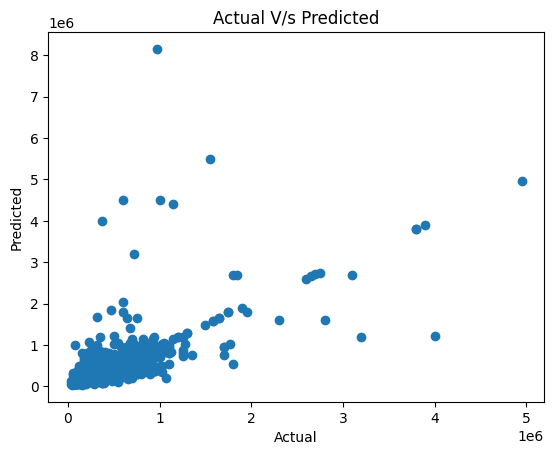

In [59]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual V/s Predicted')

In [60]:
# Study the reshape concept and construct a scatter plot that shows the actual and predicted values w.r.t. X_test

<Axes: >

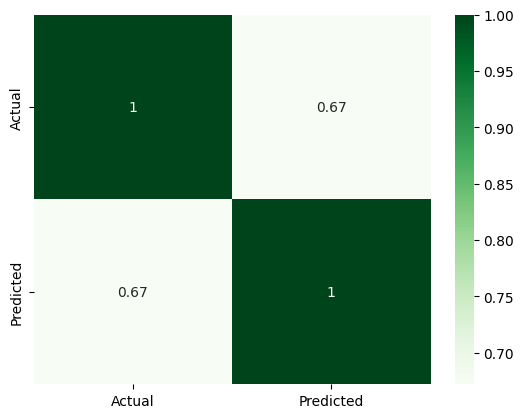

In [61]:
sns.heatmap(target.corr(), annot = True, cmap = 'Greens')

# Performance metrics

In [62]:
r2_score(y_test, y_pred)

0.07636740526136498

In [63]:
mean_squared_error(y_test, y_pred)

211645836466.0286

In [64]:
mean_absolute_error(y_test, y_pred)

173841.2891693432